In [6]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.0/165.0 kB 2.4 MB/s eta 0:00:00a 0:00:01
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 38.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.3/249.3 kB 29.4 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 60.0 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 70.3 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 13.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: /Library/Developer

In [7]:
import pandas as pd

# Carregar os dados
df = pd.read_csv('Hotel-Reservations.csv')

# Criar a coluna stay_duration
df['stay_duration'] = df.apply(lambda row: row['no_of_weekend_nights'] + row['no_of_week_nights'], axis=1)

# Exibir as primeiras linhas para verificação
df.head()


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,stay_duration
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled,3
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled,5
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled,3
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled,2
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled,2


In [8]:
# Normalização Min-Max
df['avg_price_per_room_normalized'] = df['avg_price_per_room'].transform(lambda x: (x - x.min()) / (x.max() - x.min()))

# Exibir as primeiras linhas para verificação
df.head()


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,stay_duration,avg_price_per_room_normalized
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,...,2,Offline,0,0,0,65.00,0,Not_Canceled,3,0.120370
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,...,6,Online,0,0,0,106.68,1,Not_Canceled,5,0.197556
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,...,28,Online,0,0,0,60.00,0,Canceled,3,0.111111
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,...,20,Online,0,0,0,100.00,0,Canceled,2,0.185185
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,...,11,Online,0,0,0,94.50,0,Canceled,2,0.175000


In [9]:
# Substituir a coluna utilizando regex para extrair apenas números
df['room_type_reserved'] = df['room_type_reserved'].replace(r'\D', '', regex=True)

# Exibir as primeiras linhas para verificação
df.head()


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,stay_duration,avg_price_per_room_normalized
0,INN00001,2,0,1,2,Meal Plan 1,0,1,224,2017,...,2,Offline,0,0,0,65.00,0,Not_Canceled,3,0.120370
1,INN00002,2,0,2,3,Not Selected,0,1,5,2018,...,6,Online,0,0,0,106.68,1,Not_Canceled,5,0.197556
2,INN00003,1,0,2,1,Meal Plan 1,0,1,1,2018,...,28,Online,0,0,0,60.00,0,Canceled,3,0.111111
3,INN00004,2,0,0,2,Meal Plan 1,0,1,211,2018,...,20,Online,0,0,0,100.00,0,Canceled,2,0.185185
4,INN00005,2,0,1,1,Not Selected,0,1,48,2018,...,11,Online,0,0,0,94.50,0,Canceled,2,0.175000


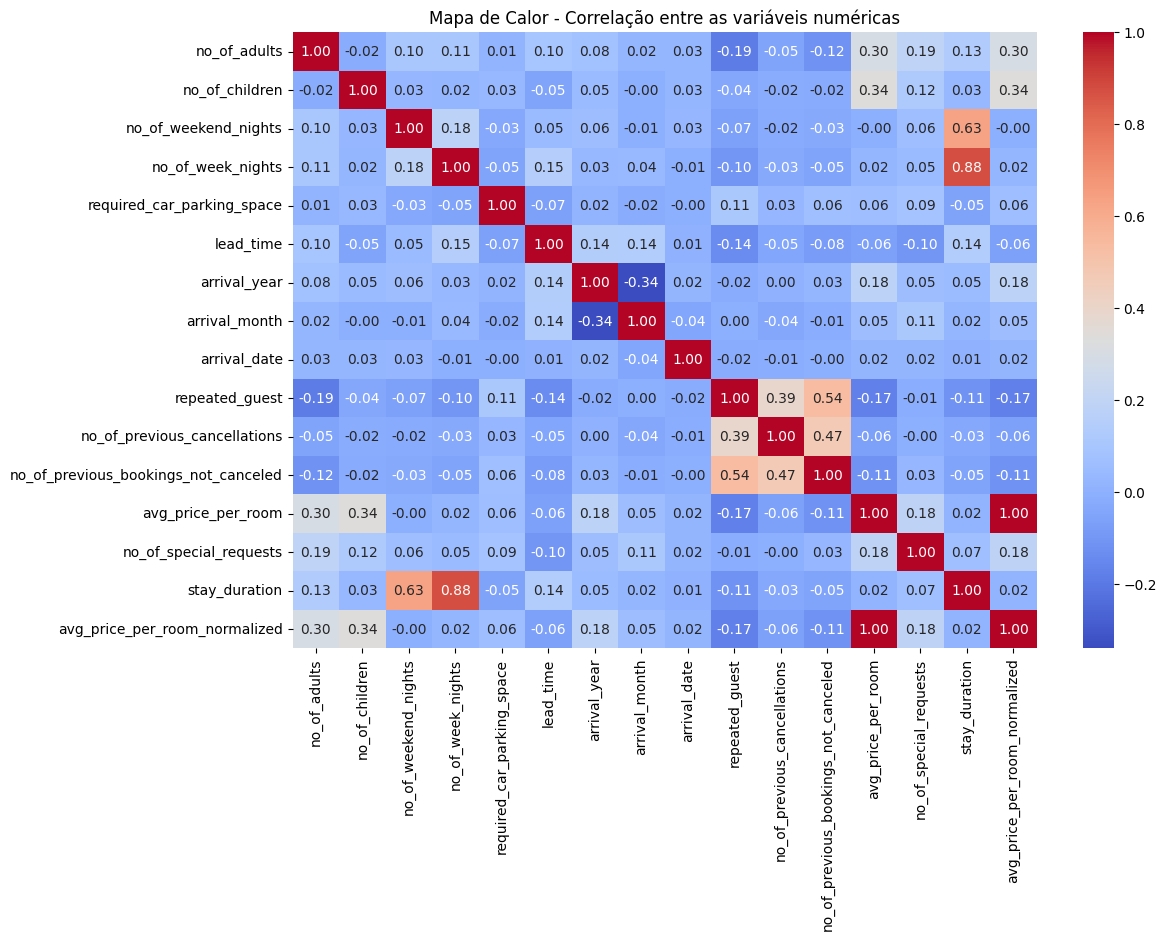

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionar as colunas numéricas
numeric_cols = df.select_dtypes(include='number').columns

# Calcular a correlação entre as variáveis
correlation_matrix = df[numeric_cols].corr()

# Plotar o mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor - Correlação entre as variáveis numéricas')
plt.show()


In [11]:
# Substituir a coluna utilizando regex para extrair apenas números
df['Booking_ID'] = df['Booking_ID'].replace(r'\D', '', regex=True)

# Exibir as primeiras linhas para verificação
df.head()


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,stay_duration,avg_price_per_room_normalized
0,00001,2,0,1,2,Meal Plan 1,0,1,224,2017,...,2,Offline,0,0,0,65.00,0,Not_Canceled,3,0.120370
1,00002,2,0,2,3,Not Selected,0,1,5,2018,...,6,Online,0,0,0,106.68,1,Not_Canceled,5,0.197556
2,00003,1,0,2,1,Meal Plan 1,0,1,1,2018,...,28,Online,0,0,0,60.00,0,Canceled,3,0.111111
3,00004,2,0,0,2,Meal Plan 1,0,1,211,2018,...,20,Online,0,0,0,100.00,0,Canceled,2,0.185185
4,00005,2,0,1,1,Not Selected,0,1,48,2018,...,11,Online,0,0,0,94.50,0,Canceled,2,0.175000


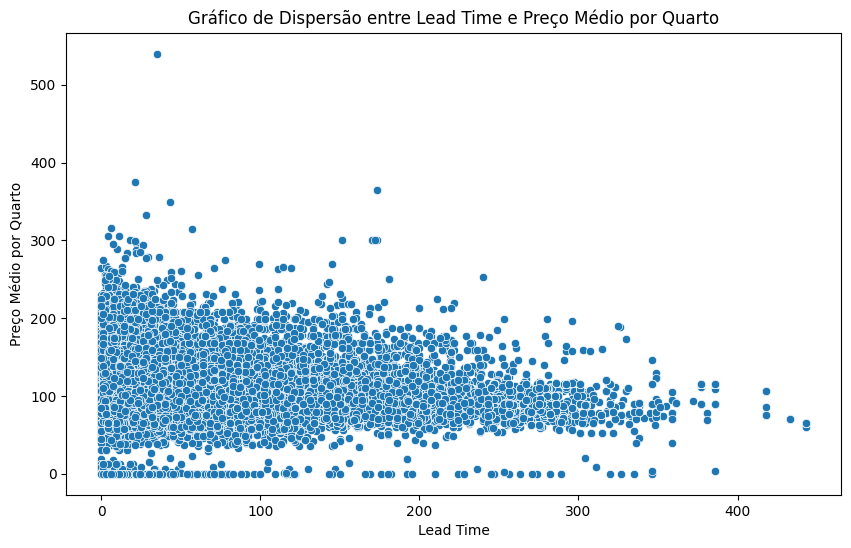

In [12]:
# Plotar o gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lead_time', y='avg_price_per_room', data=df)
plt.title('Gráfico de Dispersão entre Lead Time e Preço Médio por Quarto')
plt.xlabel('Lead Time')
plt.ylabel('Preço Médio por Quarto')
plt.show()


In [13]:
# Calcular o preço médio por tipo de quarto
avg_price_by_room_type = df.groupby('room_type_reserved')['avg_price_per_room'].mean().reset_index()

# Exibir as primeiras linhas para verificação
avg_price_by_room_type.head()


,room_type_reserved,avg_price_per_room
0,1,95.918532
1,2,87.848555
2,3,73.678571
3,4,125.287317
4,5,123.733623


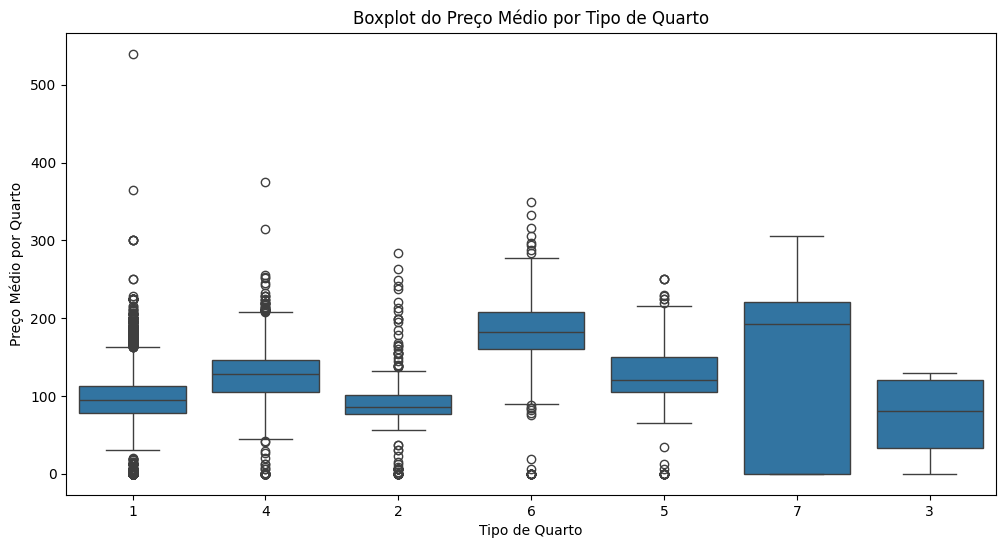

In [14]:
# Plotar o boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='room_type_reserved', y='avg_price_per_room', data=df)
plt.title('Boxplot do Preço Médio por Tipo de Quarto')
plt.xlabel('Tipo de Quarto')
plt.ylabel('Preço Médio por Quarto')
plt.show()
